In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [6]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\alili\AppData\Local\Temp\ipykernel_24996\1252176479.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C

In [7]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,14.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


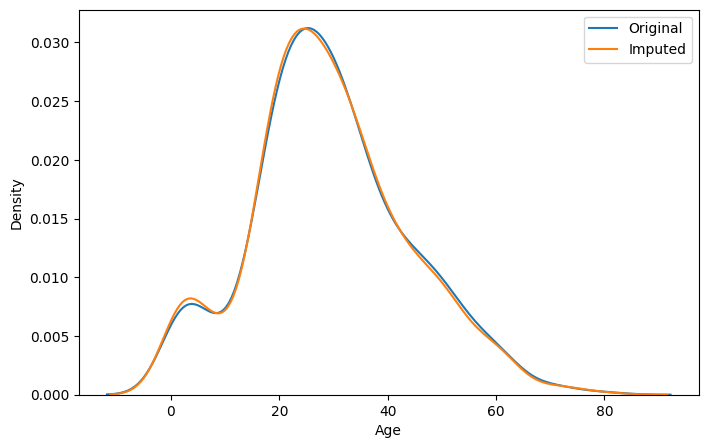

In [8]:
plt.figure(figsize=(8,5))

sns.kdeplot(X_train['Age'], label='Original')
sns.kdeplot(X_train['Age_imputed'], label='Imputed')

plt.legend()
plt.show()

In [9]:
print(X_train['Age'].var())
print(X_train['Age_imputed'].var())

210.2517072477435
209.43375043458337


In [10]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,62.987534
Age,71.580633,210.251707,210.251707
Age_imputed,62.987534,210.251707,209.433750


<Axes: >

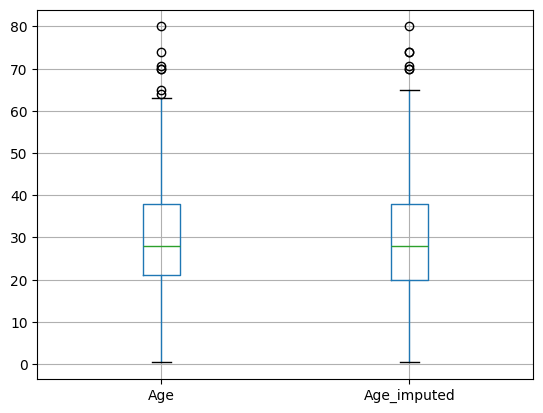

In [11]:
X_train[['Age', 'Age_imputed']].boxplot()

In [12]:
data = pd.read_csv("house-train.csv", usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [13]:
data.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [14]:
X = data
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [16]:
X_train.sample(3)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
288,NaN,TA,122000,TA,NaN
95,TA,TA,185000,TA,TA
468,Gd,TA,250000,TA,Gd


In [17]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]= X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]= X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]= X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]= X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\alili\AppData\Local\Temp\ipykernel_24996\2061348829.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]= X_train['GarageQual'].dropna().sample(X_train['GarageQual

In [18]:
temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
     X_train['GarageQual_imputed'].value_counts() / len(X_train)
], axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951087,0.951199
Fa,0.032609,0.031678
Gd,0.011775,0.011986
Ex,0.002717,0.003425
Po,0.001812,0.001712


In [19]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
     X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
], axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.491143,0.261130
TA,0.405797,0.215753
Fa,0.043478,0.023116
Ex,0.033816,0.017979
Po,0.025765,0.013699


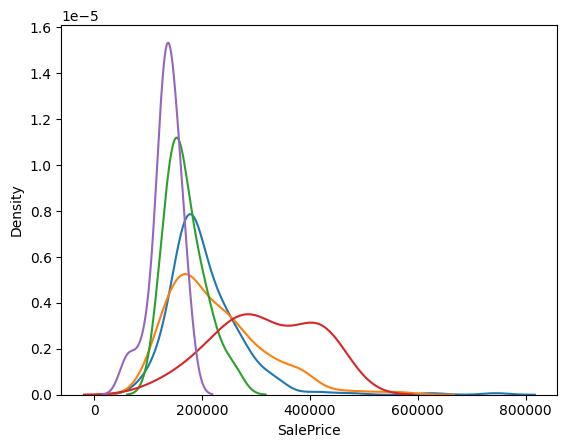

In [20]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)

plt.show()

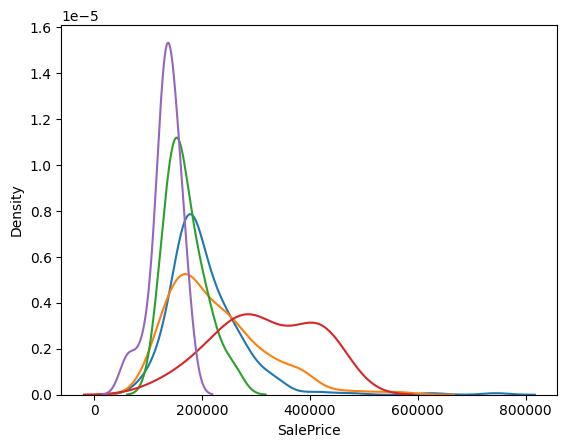

In [21]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)

plt.show()